In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'labs'))
	print(os.getcwd())
except:
	pass


 # Data Mining 7331 - Summer 2019
 ## MiniLab 1 - Logistic Regression and Support Vector Machines

 ### Carson Drake, Che Cobb, David Josephs, Andy Heroy

 ## Table of Contents
 We'll have to put one in tomorrow, i'm just going to start writing

 supposed to be a table on contents, but i dont know how to make
 markdown do that yet.

 ## Section 1: Business Understanding
 ### Section 1a: Describe the purpose of the data set you selected.
 We chose this dataset from the UCI's machine learning repository for its categorical
 predictive attributes.  It contains 1994 Census data pulled from the US Census
 database.  The prediction task we've set forth is to predict if a persons
 salary range is >50k in a 1994, based on the various categorical/numerical
 attributes in the census database. The link to the data source is below:

 https://archive.ics.uci.edu/ml/datasets/census+income

 ### Section 1b: Describe how you would define and measure the outcomes from the dataset.
 (That is, why is this data important and how do you know if you have mined
 useful knowledge from the dataset? How would you measure the effectiveness of
 a good prediction algorithm? Be specific.)

 The main benefit of this data is to be able to predict a persons salary range
 based on factors collected around each worker in 1994.  With that insight, we
 can look at a persons, age, education, marital status, occupation and begin to
 explore the relationships that most influence income.  We'd like to find:
   * What factors are the strongest influence of a how much many they will
     make.
   * What age groups show the largest amount of incomes over >50k?  aka, what
     years of our life should we be working hardest in order to make the most
     money.
   * Does where you come from influence your income? (native country)

 ## Section 2: Data Understanding
 ### Section 2a: Describe the meaning and type of data for each attribute
 Here we will discuss each attribute and give some description about its ranges.


 Categorical - Description
 #### Categorical Attributes
 * workclass - Which business sector do they work in?
 * education - What level of education received?
 * marital_status - What is their marriage history
 * occupation - What do they do for a living
 * relationship - Family member relation
 * race - What is the subjects race
 * gender - What is the subjects gender
 * native_country - Where is the subject originally from
 * income_bracket - Do they make over or under 50k/year

 #### Continuous Attributes
 * age - How old is the subject?
 * fnlwgt - Sampling weight of observation
 * education_num - numerical encoding of education variable
 * capital_gain - income from investment sources, separate from wages/salary
 * capital_loss - losses from investment sources, separate from wages/salary
 * hours_per_week - How many hours a week did they work?


 ### Section 2b: Data Quality
 Verify data quality: Explain any missing values, duplicate data, and outliers.
 Are those mistakes? How do we deal with these problems?

 In the next code section we will import our libraries and data, then begin looking at
 missing data, duplicate data, and outliers.

In [2]:
# Add library references
import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.plotly as py
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')



In [3]:
df_headers = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income_bracket'
]
df_census = pd.read_csv("data/adult-training.csv",
    names=df_headers, 
    index_col=False)
# Input in case we want to combine the dataframes. 
# df_test = pd.read_csv("data/adult-test.csv",names = df_headers,skiprows=1)
# df_census = pd.concat([df_test, df_census], axis=0)

df_census.head(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


 First, we'll start with looking at the head of the table to get a
 feel for overall structure and the variables that we're working with. Followed
 by a count of any missing values within the dataset.  We see that our data has
 no missing values which is great under most circumstances, but we also found
 that instead of marking the data with an NA, they did so with a "?.  Our first
 order of business is to replace those values.  We found counts of ? values in
 WorkClass, Occupation, and native country.  For now, we'll replace them with
 "Other"



In [4]:
print("Structure of data:\n",df_census.shape,"\n")
print("Count of missing values:\n",df_census.isnull().sum().sort_values(ascending=False),"\n")
print("Count of ? values in workclass: " ,df_census.loc[df_census.workclass == ' ?', 'workclass'].count())
print("Count of ? values in occupation: ", df_census.loc[df_census.occupation == ' ?', 'occupation'].count())
print("Count of ? values in native_country: ", df_census.loc[df_census.native_country == ' ?', 'native_country'].count())


Structure of data:
 (32561, 15) 

Count of missing values:
 income_bracket    0
native_country    0
hours_per_week    0
capital_loss      0
capital_gain      0
gender            0
race              0
relationship      0
occupation        0
marital_status    0
education_num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64 

Count of ? values in workclass:  1836
Count of ? values in occupation:  1843
Count of ? values in native_country:  583


 While our missing values count is very low, we now must change
 all the ? entries to other in order not cause further errors.  We'll also be
 grouping each individual native country into their respective continent.  We
 feel that grouping as such will give us more insight into how U.S. immigrants
 fare in the job market.  We'll also introduce a pair plot to look in the
 visualization section to look for any outliers.  Which spoiler alert, it
 doesn't look like we have any that cause great concern.

In [5]:
# Change income bracket values that have a . at end and remove space 
df_census = df_census.replace(to_replace=(' >50K.', ' >50K'),value='>50K')
df_census = df_census.replace(to_replace=(' <=50K.', ' <=50K'),value='<=50K')    
df_census = df_census.replace(to_replace=(' United-States', ' Honduras', ' Mexico',' Puerto-Rico',' Canada', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Guatemala', ' El-Salvador' ),value='North America')
df_census = df_census.replace(to_replace=(' Cuba', ' Jamaica', ' Trinadad&Tobago', ' Haiti', ' Dominican-Republic' ),value='Caribbean')
df_census = df_census.replace(to_replace=(' South', ' Cambodia',' Thailand',' Laos', ' Taiwan', ' China', ' Japan', ' India', ' Iran', ' Philippines', ' Vietnam', ' Hong'),value='Asia')
df_census = df_census.replace(to_replace=(' England', ' Germany', ' Portugal', ' Italy', ' Poland', ' France', ' Yugoslavia',' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands'),value='Europe') 
df_census = df_census.replace(to_replace=(' Columbia', ' Ecuador', ' Peru'),value='South America')
df_census = df_census.replace(to_replace=(' ?'),value='Other') 

# encoding into 1 and zero variables for income_bracket. 
# df_census['income_bracket'] = df_census['income_bracket'].apply(lambda x: 1 if x=='>50K' else 0)


 ### Section 2c: Simple Statistics

 #### Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting.

 Now that our data has been cleansed of any obvious errors, it's time to look at
 the statistics behind our continuous data in order to look for any other
 errors in the data we might have missed.  We also can get a look at how many
 variables each of our categorical attributes carry with them.  This will be
 useful down the line when we start grouping items for our basic EDA charts we
 would like to produce.

In [6]:
for i in df_headers:
    
    print(i, 
    "type: {}".format(df_census[i].dtype),
    "# unique: {}".format(df_census[i].nunique()),
    sep="\n  ", end="\n\n")
    
print("Summary Statistic's:\n",round(df_census.describe().unstack(),2),"\n")



age
  type: int64
  # unique: 73

workclass
  type: object
  # unique: 9

fnlwgt
  type: int64
  # unique: 21648

education
  type: object
  # unique: 16

education_num
  type: int64
  # unique: 16

marital_status
  type: object
  # unique: 7

occupation
  type: object
  # unique: 15

relationship
  type: object
  # unique: 6

race
  type: object
  # unique: 5

gender
  type: object
  # unique: 2

capital_gain
  type: int64
  # unique: 119

capital_loss
  type: int64
  # unique: 92

hours_per_week
  type: int64
  # unique: 94

native_country
  type: object
  # unique: 6

income_bracket
  type: object
  # unique: 2

Summary Statistic's:
 age             count      32561.00
                mean          38.58
                std           13.64
                min           17.00
                25%           28.00
                50%           37.00
                75%           48.00
                max           90.00
fnlwgt          count      32561.00
                mean      18977

In [7]:
education_categories = list(df_census.education.unique())
print(df_census.groupby(['education','gender'])['gender'].count().unstack())


gender          Female   Male
education                    
 10th              295    638
 11th              432    743
 12th              144    289
 1st-4th            46    122
 5th-6th            84    249
 7th-8th           160    486
 9th               144    370
 Assoc-acdm        421    646
 Assoc-voc         500    882
 Bachelors        1619   3736
 Doctorate          86    327
 HS-grad          3390   7111
 Masters           536   1187
 Preschool          16     35
 Prof-school        92    484
 Some-college     2806   4485


In [8]:
secondary = [
    'education',
    'gender',
    'race',
    'marital_status',
    'relationship',
    'native_country',
    'workclass'
    ]
for i in secondary:
    print(df_census.groupby([i,'income_bracket'])[i].count().unstack(), end="\n\n")


income_bracket   <=50K    >50K
education                     
 10th            871.0    62.0
 11th           1115.0    60.0
 12th            400.0    33.0
 1st-4th         162.0     6.0
 5th-6th         317.0    16.0
 7th-8th         606.0    40.0
 9th             487.0    27.0
 Assoc-acdm      802.0   265.0
 Assoc-voc      1021.0   361.0
 Bachelors      3134.0  2221.0
 Doctorate       107.0   306.0
 HS-grad        8826.0  1675.0
 Masters         764.0   959.0
 Preschool        51.0     NaN
 Prof-school     153.0   423.0
 Some-college   5904.0  1387.0

income_bracket  <=50K  >50K
gender                     
 Female          9592  1179
 Male           15128  6662

income_bracket       <=50K  >50K
race                            
 Amer-Indian-Eskimo    275    36
 Asian-Pac-Islander    763   276
 Black                2737   387
 Other                 246    25
 White               20699  7117

income_bracket          <=50K  >50K
marital_status                     
 Divorced               

In [9]:
# the categories that we've analyzed.  One category of capital_gain has some
# very large numbers, but we might attribute that to massive investments made by
# one individual.  After exploring further, alot of the values are 99,999. Which
# we assume to be a cap on what's reported for capital gains.  We did find that
# most of the occupations showing such capital growth was mostly executives.  So
# we're not surprised to see the higher numbers here and won't change the data.
#
# We also wanted to get a look at some of the educational categories by gender
# and income bracket to look for interesting statistics there.  We noticed that
# males tend to have more education across all education levels.  We also found that
# when looking at income bracket and education, a bachelors degree doesn't put
# you in a better place to make over 50k a year.  In fact, the only categories
# that did have a higher count in the >50k income bracket were Doctorate,
# Masters, or a professional school. 


 ### Section 2d: Interesting Visualizations

 #### Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

 Now we can start analyzing different attributes to see if anything stands out
 to us.  To start we'll begin with some histograms of the numerical attributes
 in order to look at the ranges again and check for skew.  We'll also look at
 some box plots of gender and marital status to continue our exploration into
 those categories.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000128476C30F0>,
      dtype=object)

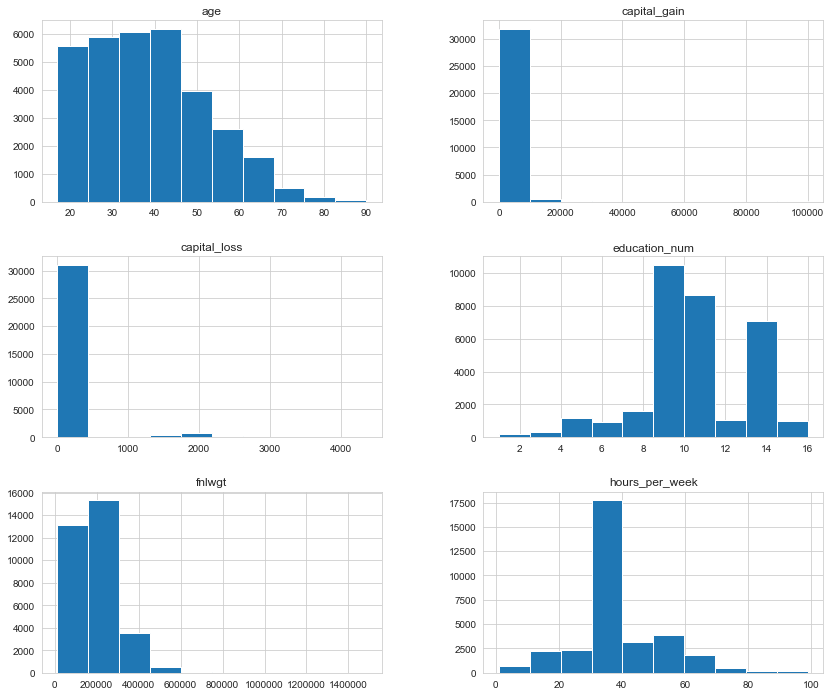

In [10]:
#Histogram charts
sns.set_style('whitegrid')
df_num = df_census.select_dtypes(include=['float64'])
df_census.hist(figsize =(14,12))



 The histograms show us all things we expect to see from the
 numerical categories.  Most of the workforce is from 20 to 50.  Educational
 limitations look to have the largest difference between 8th - 9th grade.
 Implying that high school drop out rates are a factor in the dataset.   Hours
 per week also exhibited a large distribution around 40 hours a week, which
 fits common conception of American work hours.  fnl weight also showed some
 strange values in the upper ranges of the dataset, but seeing as its not
 going to be an area of focus for this analysis, we'll omit any changes here.

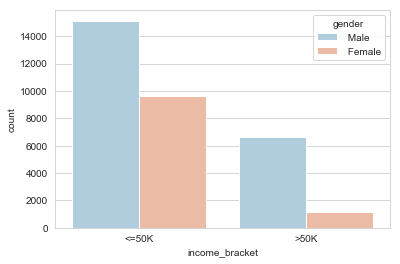

In [11]:
## boxplots of income by gender dist.
sns.set_style('whitegrid')
sns.countplot(x='income_bracket',
    hue='gender',
    data=df_census,
    palette='RdBu_r')


 This bar chart shows us the differences in male and female income based on
 gender.  We see counts are much higher in both income brackets for males.
 Suggesting that in 1994, the American workforce sampled had more men than
 women in the workforce.  In the >50k income bracket, males showed an even
 higher difference between their female counterparts, suggesting that males
 dominate that income bracket more so than those in the <=50 income bracket.


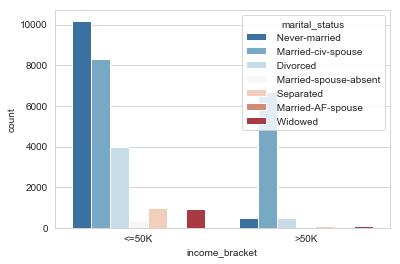

In [12]:
## by marital status
sns.set_style('whitegrid')
sns.countplot(x='income_bracket',
    hue='marital_status',
    data=df_census,
    palette='RdBu_r')



 This bar chart represents income bracket by marital status.
 Interesting to see a few things, first off the <=50k income bracket highest
 counts come from the "Never-married" status.  This suggests that marriage does
 in fact come with alot of financial benefit, as you can see is relevant on the
 other half of the chart.  As married couples far outmatch any other category
 counts in the >50k income bracket.  We can confirm this again as most of the
 divorced, separated, or widowed people are located in the lower income
 bracket.  Suggesting that, if you want to make over 50k, you might
 want to get yourself a partner and keep them!

 ### Section 2e: Explore Joint Attributes

 #### Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

 Now follows a bevy of various plots to explore the relationships between the
 data that we might see.  First on that list in the correlation plot to see if
 there might be any between the numerical attributes.

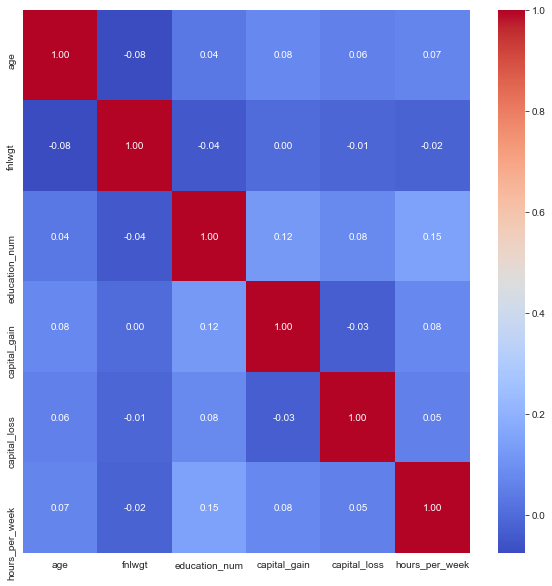

In [13]:
#Generate Correlation HeatMap
colormap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(10, 10))
corr = df_census.corr()

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



 The correlation heatmap above shows that we have very little
 correlation within our dataset.  No two attributes scored above 0.2
 correlation.  The only ones that look to be slightly related are that of
 education_num and hours_per_week (0.15).  Which leads to some interesting
 possibilities if the amount of education you received determined the hours you
 worked.  We speculate that the more education received, the longer the hours
 you might work.  To check that, let's make a dot plot to view means of hours
 worked per the education category.

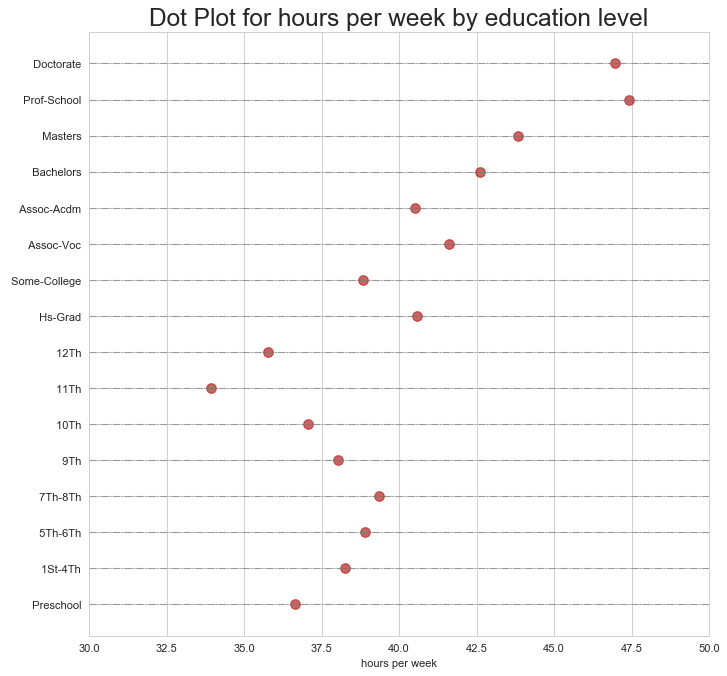

In [14]:

df = df_census[['hours_per_week', 'education','education_num']].groupby('education').apply(lambda x: x.mean())
df.sort_values('education_num', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10,10), dpi= 80)
ax.hlines(y=df.index, xmin=30, xmax=50, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.hours_per_week, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for hours per week by education level', fontdict={'size':22})
ax.set_xlabel('hours per week')
ax.set_yticks(df.index)
ax.set_yticklabels(df.education.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(30, 50)
plt.show()


 Indeed we see our suspicion confirmed.  As you increase your
 educational level, your hours per week will too increase.  Doctorates and
 Prof-school being the highest.  The interesting thing to note here is the
 "Prof-School" category.  Which is defined as a trade school.  Therefore, Those
 with the highest working hours are those of higher or specialized education.
 Now lets move onto the pairplot and start to get a feel for how our categorial
 data is distributed.

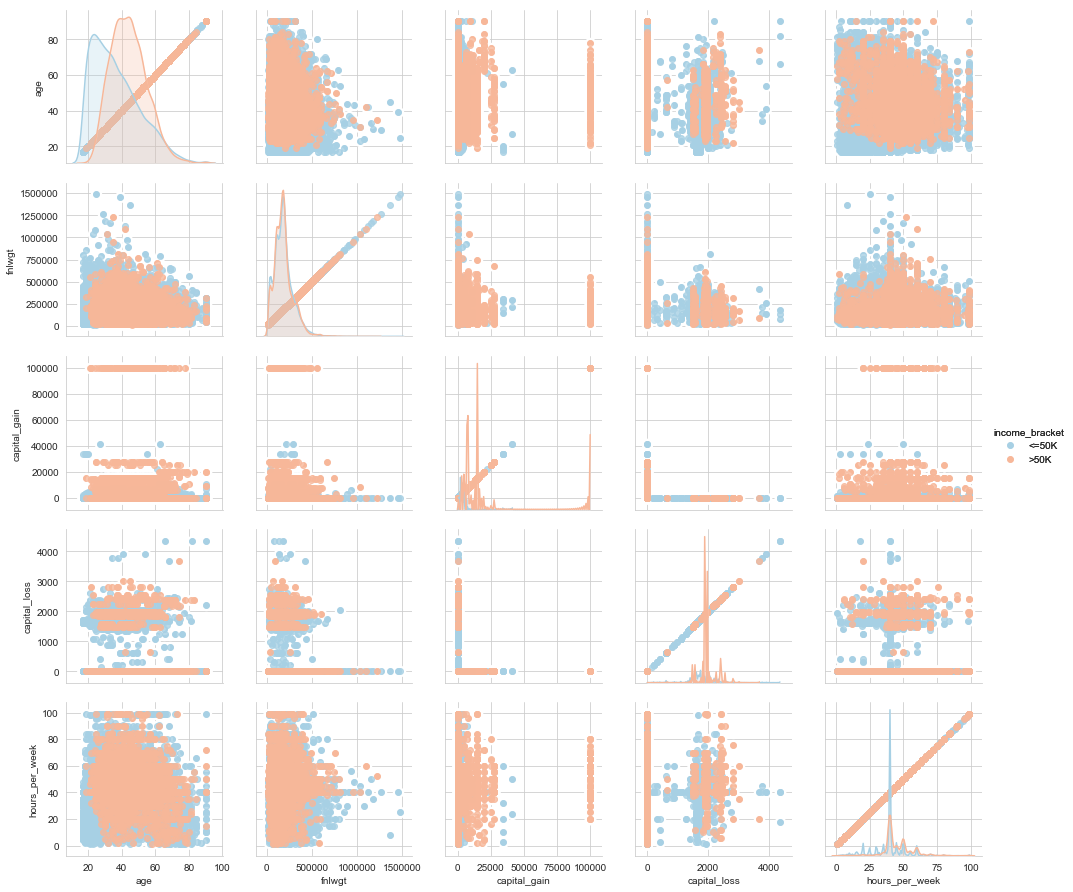

In [15]:
# Pairplot matrix.
g = sns.pairplot(df_census,kind="scatter",vars=['age','fnlwgt',
                               'capital_gain','capital_loss', 
                               'hours_per_week'],
                               hue='income_bracket',
                               plot_kws=dict(s=80, edgecolor="white", linewidth=2.5),
                               palette = 'RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();


 Our pairplot shows us a few things.  It confirms some of our earlier
 statements behind ranges and why certain attributes (captial_gain,
 capital_loss) have what look to be outliers, but really is the upper class
 making more money than the rest of us.  The other distributions look to be ok
 with minmal outliers in them. We see the normal age skew in that the <50k
 market is usually a younger age group.  Since we're now interested in age
 groups.  Lets split up the age groups in bins of 10 years, and see what kind
 of income differences we see.


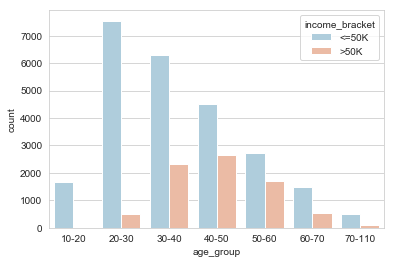

In [16]:
df_age = df_census.loc[:,['gender', 'age', 'income_bracket', 'hours_per_week']]
conditions = [
    (df_age['age'] < 20),
    (df_age['age'] < 30),
    (df_age['age'] < 40),
    (df_age['age'] < 50),
    (df_age['age'] < 60),
    (df_age['age'] < 70),
    (df_age['age'] < 110)]
choices = ['10-20', '20-30', '30-40','40-50','50-60','60-70','70-110']
df_age['age_group'] = np.select(conditions, choices, default='70-110')

sns.set_style('whitegrid')
sns.countplot(x='age_group',
    hue='income_bracket',
    data=df_age,
    palette='RdBu_r',
    order=choices)


 The first thing we're drawn too is that not many 10-20 year olds are making
 over 50k!  What a surprise.  Its interesting how the two income groups tend to
 converge once age groups get to the 40-50 range, but then both steadily
 decline afterwards.  This follows suit with the average retirement age in
 America of 62 years old.  But the largest jump in those in the >50k group
 looks to happen around age 30 to 40.  Suggesting that if you're not clearing
 that mark by 40, then chances are its going to get a harder to do so from
 then on.

 The next plot deals looks at how these age groups fare with hours per week
 worked.  We were interested in seeing if you work longer hours, does it pay
 and at what ages would that be most beneficial?

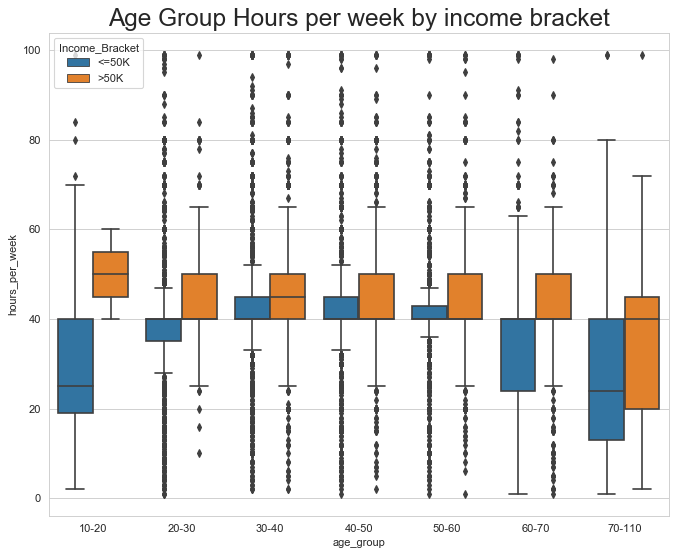

In [17]:

# Box Plot of age group by income bracket.

plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x='age_group', y='hours_per_week', 
            data=df_age, hue='income_bracket',
            order=choices,palette="tab10")

# Decoration
plt.title('Age Group Hours per week by income bracket', fontsize=22)
plt.legend(title='Income_Bracket')
plt.show()


 We see a similar trend from ages 20 to 60.  That if you do want to make
 more money, its going to come at a cost of working longer hours.  We also see
 the <50k income group exhibit some interesting behavior that their hours never
 really creep much higher than the 40 hour per week mark.  Suggesting that if
 you do make less money, than you probably won't have much opportunity to work
 longer hours for extra income.  Another limiting factor of being
 in the lower income bracket.

 Next, we implemented a voilin plot to determine what native countries people
 immigrated from and how their income distribution fared in the US.  Remember
 previously we assigned each native country to their native continent so really
 this will be an examination of immigration by age, gender and continent.


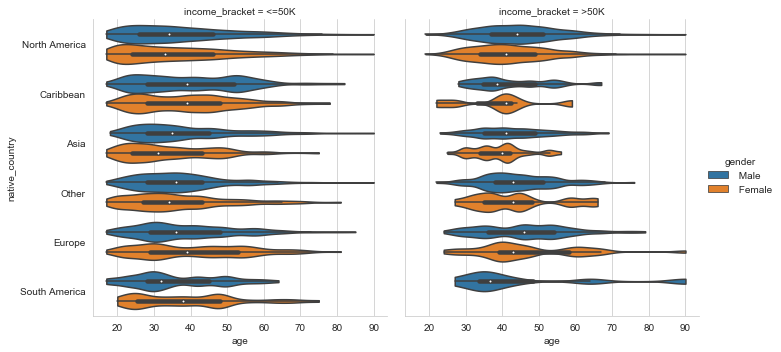

In [18]:
sns.catplot(x="age", y="native_country",
            hue="gender", col="income_bracket",
            data=df_census,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)



 While there's alot going on in this chart,  a few things stand out to us.  The
 native country confirms what we've been seeing all along in the age group of
 the workforce.  The <50k income bracket is mostly comprised of younger
 individuals, with a suprising amount of younger Asian women.  On the subject
 of women, it would seem that older women make up alot of the >50k when Europe
 is their native country.  This suggests middle aged, higher paid European women
 tend to come to the U.S. for a chance to make better money.

In [19]:
df_cols = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income_bracket'
]
cat_cols = [
    "workclass",
    "marital_status", 
    "occupation",
    "race", 
    "gender",
    "relationship"]

cont_cols = [
    "age", 
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week"]

drop_cols = [
    'fnlwgt',
    "native_country",
    "education"]

target_col = "target"


 ## Section 3: Logistic Regression and Support Vector Machine
 ### Section 3a: Create Models

 #### Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.
  Logistic regression (LR) and support vector machines (SVM) are two of the
  more popular classification methods available for data scientists today. The
  basics behind LR is that it takes the output of a linear model and crams it
  into a logistic function to give it a probablity of 0 to 1 (but never
  equaling 0 or 1).  SVM on the other hand, tries to find the hyper plane that
  has the maximum margin that can classify points in an n-(number of features)
  space.  Basically, SVM gives a binary class output, while LR looks at
  probabilities for its classification.  We'll start with logistic regression,
  and then move into support vector machines.

In [20]:

# TODO - Undo this and use the train test split function Che used
# The ruberic specifically mentions to use an 80/20 split.

df_training = pd.read_csv("data/adult-training.csv",
    names=df_cols, 
    skipinitialspace = True)

df_test = pd.read_csv("data/adult-test.csv",
    names = df_cols,
    skipinitialspace = True,
    skiprows=1)

# TODO - Also if time, make this data initialization and cleaning into a function.
# It would be very helpful to show how some features improve accuracy


In [21]:
df_training[target_col] = (df_training["income_bracket"]
    .apply(lambda x: ">50K" in x)).astype(int)
df_test[target_col] = (df_test["income_bracket"]
    .apply(lambda x: ">50K" in x)).astype(int)


In [22]:
# Make all education values that didnt graduate HS 'No Diploma'
# the 2 associate values to Associates
# some college and HS-grad to Diploma
replace_edu_no = ('1st-4th', '5th-6th','7th-8th','9th', '10th', '11th', '12th', 'Preschool')
replace_edu_associate = ('Assoc-acdm', 'Assoc-voc')
replace_edu_diploma = ('Some-college', 'HS-grad')

df_training.education = df_training.education.replace(to_replace=replace_edu_no,value='No Diploma')
df_training.education = df_training.education.replace(to_replace=replace_edu_associate,value='Associates')
df_training.education = df_training.education.replace(to_replace=replace_edu_diploma,value='Diploma')

df_test.education = df_test.education.replace(to_replace=replace_edu_no,value='No Diploma')
df_test.education = df_test.education.replace(to_replace=replace_edu_associate,value='Associates')
df_test.education = df_test.education.replace(to_replace=replace_edu_diploma,value='Diploma')

df_training['education'] = df_training['education'].str.strip()
df_test['education'] = df_test['education'].str.strip()


In [23]:
# Put countries in their native region continent
replace_northA = ('United-States', 'Honduras', 'Mexico','Puerto-Rico','Canada', 'Outlying-US(Guam-USVI-etc)', 'Nicaragua', 'Guatemala', 'El-Salvador')
replace_carib = ('Cuba', 'Jamaica', 'Trinadad&Tobago', 'Haiti', 'Dominican-Republic')
replace_asia = ('South', 'Cambodia','Thailand','Laos', 'Taiwan', 'China', 'Japan', 'India', 'Iran', 'Philippines', 'Vietnam', 'Hong')
replace_europe = ('England', 'Germany', 'Portugal', 'Italy', 'Poland', 'France', 'Yugoslavia','Scotland', 'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands')
replace_sa = ('Columbia', 'Ecuador', 'Peru')
replace_other = ('?')
df_training.native_country = df_training.native_country.replace(to_replace=replace_northA,value='North America')
df_training.native_country = df_training.native_country.replace(to_replace=replace_carib,value='Caribbean')
df_training.native_country = df_training.native_country.replace(to_replace=replace_asia,value='Asia')
df_training.native_country = df_training.native_country.replace(to_replace=replace_europe,value='Europe') 
df_training.native_country = df_training.native_country.replace(to_replace=replace_sa,value='South America')
df_training.native_country = df_training.native_country.replace(to_replace=replace_other,value='Other')   

df_test.native_country = df_test.native_country.replace(to_replace=replace_northA,value='North America')
df_test.native_country = df_test.native_country.replace(to_replace=replace_carib,value='Caribbean')
df_test.native_country = df_test.native_country.replace(to_replace=replace_asia,value='Asia')
df_test.native_country = df_test.native_country.replace(to_replace=replace_europe,value='Europe') 
df_test.native_country = df_test.native_country.replace(to_replace=replace_sa,value='South America')
df_test.native_country = df_test.native_country.replace(to_replace=replace_other,value='Other') 


In [24]:

df_training.drop(drop_cols,axis=1,inplace=True)
df_test.drop(drop_cols,axis=1,inplace=True)


In [25]:
df_training2 = df_training.copy()
df_test2 = df_test.copy()


In [26]:
def convert_dummy(df,cols):
    dummies = []
    for cat in cols:
        dummy = pd.get_dummies(df[cat],
        drop_first=True)
        dummies.append(dummy)
        df.drop(cat,axis=1,inplace=True)
    
    return pd.concat([df,*dummies], axis=1)

df_training_dum = convert_dummy(df_training.copy(),cat_cols)
df_test_dum = convert_dummy(df_test.copy(),cat_cols)


In [27]:
X_train = df_training_dum.drop(columns=["income_bracket",target_col])
y_train = df_training_dum[target_col]
X_test = df_test_dum.drop(columns=["income_bracket",target_col])
y_test = df_test_dum[target_col]

X_train2 = df_training2.drop(columns=["income_bracket",target_col])
y_train2 = df_training2[target_col]
X_test2 = df_test2.drop(columns=["income_bracket",target_col])
y_test2 = df_test2[target_col]


 ## Logistic Regression

In [28]:
# Import sklearn libs 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , classification_report, log_loss
from sklearn.svm import LinearSVC, SVC


In [29]:
def print_performance(df_t,df_p, verbose=1):
    """
    Function to normalize outputs for models and reduce repeated code
    
    Parameters
        ----------
        df_t : DataFrame
            DataFrame of test data to compare predictions with  
        df_p (DataFrame): DataFrame of prediction data to evaluate
        v : bool, optional
            whether or not to include the columns in output (default
            is TRUE)
    """
    logLoss = log_loss(df_t,df_p)
    body = [classification_report(df_t,df_p),
    "Accuracy:    %f" %accuracy_score(df_t, df_p),
    "Log Loss:    %f" % logLoss]
    if verbose:
        body = np.concatenate([body,["Continuous Columns:\n%a" % cont_cols,
            "Categorical Columns:\n%a" %cat_cols,"Drop Columns:\n%a" %drop_cols]])
    print(
    "="*80,
    *body,
    sep="\n\n",
    end="\n\n"+("="*80))


 ### Logistic Regression (dummy variables)
 To start out we train a logistic regression model using
 simple dummy variables to encode the categorical features
 in the data set for each of their k-1 levels.

In [30]:
import timeit


In [31]:
start1 = timeit.default_timer()
model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)
predictions1 = model1.predict(X_test)
stop1 = timeit.default_timer()
t1 = stop1-start1
# print(classification_report(y_test,predictions1))
# print("Accuracy:",accuracy_score(y_test, predictions1))

coef_dict = {}
for coef, feat in zip(model1.coef_[0,:],['workclass', 'marital_status', 'occupation', 'race', 'gender', 'relationship']):
    coef_dict[feat] = coef

# print("The coefficients and their weights are: ", coef_dict.items())
# print("Coefs: ", model1.coef_[0])
# print("Intercept: ", model1.intercept_)
# print_performance(y_test,predictions1,0)

print("\n runtime: ", t1)



 runtime:  0.4176987


 Now lets take the time to explain some of the precision outputs from our initial run.
 * precision - this is the ratio of the number of true positives and false positives.
 * recall - this is the ratio of the number of true positives and false negatives
 * f1-score - the harmonic mean of the precision and recall.
 * support - occurances in each class
 * accuracy - count of predictions where the predicted value equals the actual value
 * Log Loss - the negative log-likelihood of correct classification given the classifier prediction.


 These are the metrics we'll be tracking as we improve our model and will
 provide a summary towards the end.


 ### Logistic Regression (encoding and scaling)
 The next step towards improving our logistic regression
 model is to rescale the continuous features in the dataset.
 With Sklearn column transform and pipeline, we are able to apply
 the same trasforms and scaling to both the training and testing
 data that is fed to the model.

In [32]:
preprocess = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()),cont_cols),
    (OneHotEncoder(),cat_cols))

# Define the model pipeline (preprocessing step and LogisticRegression step)
model2 = make_pipeline(
    preprocess,
    LogisticRegression(solver='liblinear'))

# Fit the data

start2 = timeit.default_timer()
model2.fit(X_train2,y_train2)
# Calculate predictions
predictions2 = model2.predict(X_test2)

stop2 = timeit.default_timer()
t2 = stop2-start2

# print(classification_report(y_test2,predictions2))
# print("Accuracy:",accuracy_score(y_test2, predictions2))

print("Coefs: ", model2.steps[1][1].coef_)
print("Intercept: ", model2.steps[1][1].intercept_)
# print_performance(y_test2,predictions2,0)
print("\n runtime: ", t2)


Coefs:  [[ 0.35556391  0.72176436  2.30551077  0.25910035  0.36871751 -0.20975679
   0.54189623 -0.13486647 -0.13583252  0.04724049  0.20871141 -0.43949423
  -0.25183348 -0.99618546 -0.70058921  1.39873794  1.25024809 -0.74272686
  -1.1748748  -0.80766442 -0.59325156 -0.34558931  0.08450498 -0.31279192
   0.1486508   0.8669295  -0.92426047 -0.59501578 -0.21013168 -0.75510205
  -1.67078169  0.63754457  0.65330128  0.35789385  0.71862772 -0.0239006
  -0.54402949 -0.12507403 -0.13378125 -0.59363531  0.02639925 -1.10759914
  -0.26252168 -0.29888202  0.02348977 -0.83106526 -1.14755078 -0.13094619
   1.01483367]]
Intercept:  [-1.37012082]

 runtime:  0.5153551


 # Support Vector Machine (SVM)
 An alternative classification method to logistic regression modeling
 is SVM modeling.

 ## Simple SVM Model
 Before we jump into model optimization, we establish baseline
 metrics for using a linear kernel and a regularization coefficient (C)
 of 1 (the default value)

In [33]:
svm1 = LinearSVC(C=1.0, max_iter=10000)

start3 = timeit.default_timer()
svm1.fit(X_train, y_train)
svm1_predictions = svm1.predict(X_test)

stop3 = timeit.default_timer()
t3 = stop3-start3
print_performance(y_test,svm1_predictions,0)

print("\n runtime: ", t3)



              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12435
           1       0.67      0.60      0.64      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.78      0.76      0.76     16281
weighted avg       0.83      0.84      0.83     16281


Accuracy:    0.836374

Log Loss:    5.651509

 runtime:  49.9543244


C:\Users\andyh\Anaconda3\envs\miner\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 ## SVM (with feature scaling)
 Similar to other classification methods, SVM's can be impacted
 by varying units and magnitudes of standard deviation across
 features. To increase model accuracy the features are transformed
 similarly to how they were in the above Logistic Regression model.

In [34]:
svm2 = make_pipeline(
        preprocess,
        LinearSVC(C=1.0, max_iter=10000))

start4 = timeit.default_timer()
svm2.fit(X_train2, y_train2)
svm2_predictions = svm2.predict(X_test2)

stop4 = timeit.default_timer()
t4 = stop4-start4
print_performance(y_test2,svm2_predictions,0)

print("\n runtime: ", t4)



              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.74      0.59      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281


Accuracy:    0.854247

Log Loss:    5.034160

 runtime:  9.073946999999997


 ## SVM (optimizing C parameter)
 Outside of data standardization, accuracy can also be increased
 through model tuning. In this case, the C parameter, or Penalty
 parameter C of the error term, can be tuned to help with over and
 under fitting of the model. To tune the model a plot of prediction
 scores vs C values will illustrate the optimal C value for the
 given model.

In [35]:
C_s = np.logspace(-10, 0, 10)

scores = list()
for C in C_s:
    this_model = make_pipeline(
        preprocess,
        LinearSVC(max_iter=10000, C=C))
    this_fit = this_model.fit(X_train2, y_train2)
    # this_pred = 
    this_scores = this_fit.score(X_test2,y_test2)
    scores.append(this_scores)

max_index = np.argmax(scores)
max_C = C_s[max_index].round(8)
max_score = np.max(scores)


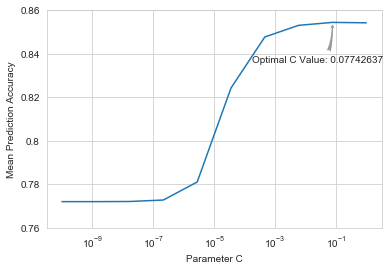

In [36]:

plt.figure()
plt.semilogx(C_s, scores)
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Mean Prediction Accuracy')
plt.xlabel('Parameter C')
plt.annotate('Optimal C Value: %s'%max_C, xy=(max_C, max_score),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()


In [37]:
svm_max = make_pipeline(
        preprocess,
        LinearSVC(
            C=max_C, 
            max_iter=10000
            )
        )

start5 = timeit.default_timer()
svm_max.fit(X_train2, y_train2)
svm_max_predictions = svm_max.predict(X_test2)

stop5 = timeit.default_timer()
t5 = stop5-start5
print_performance(y_test2,svm_max_predictions,0)

print("\n runtime: ", t5)



# TODO - From the looks of the visuals on the assignment, I think we may need 
# a probability plane. So far the best solution for this appears to be by performing
# PCA to reduce X to only 2-d features and then the probability is the 3rd dimention 
# Possibly might work to just use the two features with largest `.coef_` values?



              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.74      0.59      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281


Accuracy:    0.854432

Log Loss:    5.027796

 runtime:  1.0231107000000037


 ### Section 3b: Model Advantages

 #### Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency?

 ### Comparison of each model:

In [38]:
print('First Model:  Simple Logistic Regression \n ------------------------------------------------------------------------------------ \n')

res=print_performance(y_test,predictions1,0)
rest=print("\n runtime of seond model: ", t1)
print('Second Model: Logistic Regression with Encoding and scaling\n ------------------------------------------------------------------------------------ \n')
res2=print_performance(y_test2,predictions2,0)
rest2=print("\n runtime of seond model: ", t2)
print('Third Model: Simple SVM\n ------------------------------------------------------------------------------------ \n')
res3=print_performance(y_test,svm1_predictions,0)
rest3=print("\n runtime of third model: ", t3)
print('Fourth Model SVM with Feature Scaling \n ------------------------------------------------------------------------------------ \n')
res4=print_performance(y_test2,svm2_predictions,0)
rest4=print("\n runtime of fourth model: ", t4)

print('Fifth Model: SVM with Optimized C parameter\n ------------------------------------------------------------------------------------ \n')
res5=print_performance(y_test2,svm_max_predictions,0)
rest5=print("\n runtime of fifth model: ", t5)


First Model:  Simple Logistic Regression 
 ------------------------------------------------------------------------------------ 


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281


Accuracy:    0.852957

Log Loss:    5.078711

 runtime of seond model:  0.4176987
Second Model: Logistic Regression with Encoding and scaling
 ------------------------------------------------------------------------------------ 


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85     

 ### Model Advantages
 #### Logistic Regression
 We will first compare the two Logistic Regression models. We see that both of them
 have an accuracy of about 0.85, and a Log Loss of about 5.1. However, the model with encoding and scaling, while
 slightly less accurate than the model without, was a bit faster. For practical purposes, this is unimportant, but
 with more data, this may become important to remember. We will consider that overall, these two models are interchangeable.
 #### SVM
 Here we have much more interesting results, in order of highest accuracy/lowest log loss, we see that the SVM
 with an optimized C parameter performed with about the same (but slightly better) accuracy compared to the SVM with Feature Scaling.
 Both of these models significantly outperformed the simple SVM, which is logical as the simple SVM is in no way optimized.
 The matter of runtime is much more important here. The simple SVM took a whopping 38 seconds, while the slightly optimized feature scaled SVM took 7.2 seconds. The final
 SVM, with the optimized C parameter ran at about 0.7 seconds, nearly as fast as logistic regression. With this being said, it is clear that the most accurate and most performant, and therefore
 Most advantageous SVM model is the one with the optimized C parameter.
 #### An Interlude on SVMs: LinearSVC vs SVC(kernel='linear')
 `LinearSVC` and `SVC(kernel='linear')` are two similar functions from the sklearn suite.
 They are both useful for generating Support Vector Classifiers, however the solver
 mechanism of `LinearSVC` ('liblinear') is much more scalable compared to that of `SVC(kernel='linear')`
 ('libsvm') [source](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).
 This difference makes `LinearSVC` the prefered choice for any dataset in the 10's of thousands.
 The 'libsvm' solver scales quadradically in compute time with increase in dataset size.
 #### Comparison of all models
 We will compare the best of the SVMs, the one with the optimized C parameter, with the Logistic Regression models. The C-optimized SVM is moderately representative of the predictive
 performance of the feature-scaled SVM, except that it is way faster, and thus serves as a good benchmark to compare with logistic regression.\
 The Logistic Regression Models had an accuracy/log loss of about 0.85/5.1, while the SVM (C-optimized) reported scores of 0.85/5.0. This means that the SVM had a slightly greater degree of predictive accuracy.
 However, for this slight improvement, we can see in the tables aboce that it is also twice as slow. This means that in cases where a quick, decent prediction is needed with this dataset,
 it is far better to use logistic regression. When we need stringency and the absolute best accuracy possible, it is likley better to use a SVM, even at the cost of reduced speed.

 ### Section 3c: Interpret Feature Importance

 #### Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

 Below are the weights and names for the coefficients of our base logistic
 regression model. We will analyze the coefficients for it.

In [39]:

print("The coefficients and their weights are: ", coef_dict.items())
print("Coefs: ", model1.coef_[0])
print("Intercept: ", model1.intercept_)
#  ['workclass', 'marital_status', 'occupation', 'race', 'gender', 'relationship'])


The coefficients and their weights are:  dict_items([('workclass', 0.017850182273238452), ('marital_status', 0.23513034286430598), ('occupation', 0.00030945218843573516), ('race', 0.000644498742472443), ('gender', 0.026718228958746044), ('relationship', 0.2943059161915552)])
Coefs:  [ 1.78501823e-02  2.35130343e-01  3.09452188e-04  6.44498742e-04
  2.67182290e-02  2.94305916e-01 -3.29544371e-01 -1.18467317e-02
 -1.28656059e-01 -1.55587463e-02 -6.08734789e-01 -5.25131142e-01
 -5.25091326e-02  9.78105051e-02  4.51245063e-01 -2.87137512e-01
 -8.06892168e-01 -5.04121987e-01 -3.12288555e-01 -7.00608872e-02
 -2.23982925e-02 -2.03482017e-01  8.86368346e-01 -9.81819614e-01
 -9.02245996e-01 -4.57249963e-01 -1.05202786e+00 -1.90648005e-01
  5.94541573e-01  4.63977973e-01  1.69607274e-01  6.11578837e-01
 -2.11969695e-01 -1.00084974e+00 -1.07391336e+00 -6.50012200e-01
 -9.56047309e-01  3.88545921e-01 -1.10813179e+00 -1.01590480e+00
 -1.95209848e+00 -1.44744167e+00  7.15412169e-01]
Intercept:  [-4.


 The features above are the first 6 of the coefficients within the array
 returned from the model that are the easiest to explain as they lack
 interaction.

 | workclass | marital_status | occupation | race      | gender   | relationship |
 |-----------|----------------|------------|-----------|----------|--------------|
 | .01785055 | 0.235203       | 0.00030953 | 0.0003095 | 0.026717 | 0.294368     |


 From the above weights, we can see which of the main attributes holds what
 weight for our second model.  It would appear that marital status and
 relationship are two of the heaviest weights. This aligns with our earlier
 discovery in the EDA section above about how marital status plays a vital role
 in how much money an American made in 1994.  Gender and work class were
 similarly weighted meaning they do positively influence the LR classifier but
 not to a great degree. The lowest were race and occupation which the
 occupation realization is a bit surprising. We felt that should have carried
 more influence.  But marital status and relationships suggests that being
 married is beneficial for breaking the 50k mark, it still depends on what role
 you play in the family to decide if you're going to be income generator.  We
 believe this fits with the classical 1950's mindset of if you are the wife of
 a family, you would be expected to stay home and be in charge of domestic
 responsibilities, while the financial one would fall on other members of the
 family.



 ### Section 3d: Interpret Support Vectors

 #### Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.
 We made several attempts at being able to identify the support vectors for our
 project but sadly we came up short.  We were able to generate the model, but
 unable to retrieve them from the SVM we tried to use.